In [1]:
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df_agriculture = pd.read_csv('agricultural_land_cleaned.csv')
df_landarea = pd.read_csv('WB_total_land_area.csv')

In [8]:
df_agriculture.head()

,Country Name,Country Code,Indicator Name,2015
0,Aruba,ABW,Agricultural land (% of land area),11.111111
1,Afghanistan,AFG,Agricultural land (% of land area),58.067580
2,Angola,AGO,Agricultural land (% of land area),47.477340
3,Albania,ALB,Agricultural land (% of land area),42.857664
4,Andorra,AND,Agricultural land (% of land area),40.021277


In [9]:
df_landarea.head()

,Country Name,Country Code,Indicator Name,2017
0,Aruba,ABW,Land area (sq. km),180.0
1,Afghanistan,AFG,Land area (sq. km),652860.0
2,Angola,AGO,Land area (sq. km),1246700.0
3,Albania,ALB,Land area (sq. km),27400.0
4,Andorra,AND,Land area (sq. km),470.0


In [29]:
df_agriculture.rename(index=str, columns={"2015": "Percent agriculture", "Indicator Name": "Indicator"}, inplace=True)


In [31]:
df_landarea.rename(index=str, columns={"2017": "Land area", "Indicator Name": "Indicator"}, inplace=True)

In [38]:
df_landarea["Percent agriculture"] = df_agriculture['Percent agriculture']

In [40]:
df_landarea["Agriculture area"] = df_landarea["Land area"] * df_landarea['Percent agriculture'] / 100

In [44]:
df_landarea.head()

,Country Name,Country Code,Indicator,Land area,Percent agriculture,Agriculture area
0,Aruba,ABW,Land area (sq. km),180.0,11.111111,20.0
1,Afghanistan,AFG,Land area (sq. km),652860.0,58.067580,379100.0
2,Angola,AGO,Land area (sq. km),1246700.0,47.477340,591900.0
3,Albania,ALB,Land area (sq. km),27400.0,42.857664,11743.0
4,Andorra,AND,Land area (sq. km),470.0,40.021277,188.1


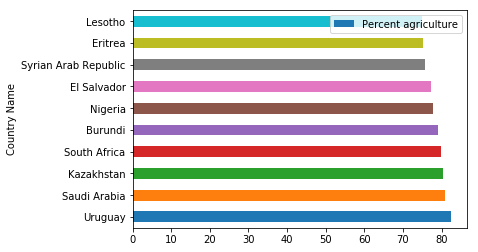

In [56]:
df_landarea.sort_values(by="Percent agriculture", ascending=False).head(10).plot(kind='barh', x='Country Name', y='Percent agriculture')

In [59]:
df_landarea.head()

,Country Name,Country Code,Indicator,Land area,Percent agriculture,Agriculture area
0,Aruba,ABW,Land area (sq. km),180.0,11.111111,20.0
1,Afghanistan,AFG,Land area (sq. km),652860.0,58.067580,379100.0
2,Angola,AGO,Land area (sq. km),1246700.0,47.477340,591900.0
3,Albania,ALB,Land area (sq. km),27400.0,42.857664,11743.0
4,Andorra,AND,Land area (sq. km),470.0,40.021277,188.1


Currently available for Cameroon, Indonesia, Liberia, and Republic of Congo

In [102]:
df = df_landarea[(df_landarea['Country Name'] == 'Cameroon') | (df_landarea['Country Name'] == 'Indonesia') | (df_landarea['Country Name'] == 'Liberia') | (df_landarea['Country Name'] == 'Congo, Rep.')]

In [103]:
df

,Country Name,Country Code,Indicator,Land area,Percent agriculture,Agriculture area
40,Cameroon,CMR,Land area (sq. km),472710.0,20.625754,97500.0
42,"Congo, Rep.",COG,Land area (sq. km),341500.0,31.118594,106270.0
104,Indonesia,IDN,Land area (sq. km),1811570.0,31.464420,570000.0
129,Liberia,LBR,Land area (sq. km),96320.0,28.031561,27000.0


In [104]:
df_palm = pd.read_csv('palm_oil_area_raw.csv')
df_palm.head()

,objectid,country,name,company,group_comp,subgroup,groupid,area_ha
0,6185,CMR,CDC Plantation,NaN,NaN,NaN,NaN,1074.32
1,6186,CMR,CDC Plantation,NaN,NaN,NaN,NaN,401.715
2,6187,CMR,Ferme suisse,NaN,NaN,NaN,NaN,4223.68
3,6188,CMR,Socapalm,NaN,NaN,NaN,NaN,5823.61
4,6189,CMR,Socapalm,NaN,NaN,NaN,NaN,16321.9


In [105]:
df_palm.drop(columns=['company', 'group_comp', 'subgroup', 'groupid'], inplace=True)

In [106]:
df_palm.country.value_counts()

IDN                 1854
MYS                  248
CMR                   91
LBR                   20
COG                   15
Papua New Guinea       4
Solomon Islands        1
Name: country, dtype: int64

In [107]:
df_palm['area_ha'] = df_palm['area_ha'].str.replace('*','')

In [111]:
df_palm.iloc[91]

objectid         6276
country           COG
name        Palmeraie
area_ha       19949.5
Name: 91, dtype: object

In [112]:
df_palm['area_sqkm'] = pd.to_numeric(df_palm['area_ha'])

In [114]:
df_palm['area_sqkm'] = df_palm['area_sqkm'] / 100

In [115]:
df_palm.head()

,objectid,country,name,area_ha,area_sqkm
0,6185,CMR,CDC Plantation,1074.32,10.74320
1,6186,CMR,CDC Plantation,401.715,4.01715
2,6187,CMR,Ferme suisse,4223.68,42.23680
3,6188,CMR,Socapalm,5823.61,58.23610
4,6189,CMR,Socapalm,16321.9,163.21900


In [116]:
df_palm.shape

(2233, 5)

In [122]:
df

,Country Name,Country Code,Indicator,Land area,Percent agriculture,Agriculture area
40,Cameroon,CMR,Land area (sq. km),472710.0,20.625754,97500.0
42,"Congo, Rep.",COG,Land area (sq. km),341500.0,31.118594,106270.0
104,Indonesia,IDN,Land area (sq. km),1811570.0,31.464420,570000.0
129,Liberia,LBR,Land area (sq. km),96320.0,28.031561,27000.0


In [128]:
total_palm_area_Cameroon = sum(df_palm[df_palm['country'] == 'CMR'].area_sqkm)
total_palm_area_Congo = sum(df_palm[df_palm['country'] == 'COG'].area_sqkm)
total_palm_area_Indonesia = sum(df_palm[df_palm['country'] == 'IDN'].area_sqkm)
total_palm_area_Liberia = sum(df_palm[df_palm['country'] == 'LBR'].area_sqkm)

In [129]:
df_palm['Palm area'] = 0

In [140]:
df_palm.loc[df_palm['country'] == 'CMR', 'Palm area'] = total_palm_area_Cameroon
df_palm.loc[df_palm['country'] == 'COG', 'Palm area'] = total_palm_area_Congo
df_palm.loc[df_palm['country'] == 'IDN', 'Palm area'] = total_palm_area_Indonesia
df_palm.loc[df_palm['country'] == 'LBR', 'Palm area'] = total_palm_area_Liberia

In [148]:
df['Palm area'] = 0
df.loc[df['Country Code'] == 'CMR', 'Palm area'] = total_palm_area_Cameroon
df.loc[df['Country Code'] == 'COG', 'Palm area'] = total_palm_area_Congo
df.loc[df['Country Code'] == 'IDN', 'Palm area'] = total_palm_area_Indonesia
df.loc[df['Country Code'] == 'LBR', 'Palm area'] = total_palm_area_Liberia

/Users/max/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/max/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [149]:
df

,Country Name,Country Code,Indicator,Land area,Percent agriculture,Agriculture area,Palm area
40,Cameroon,CMR,Land area (sq. km),472710.0,20.625754,97500.0,1989.197370
42,"Congo, Rep.",COG,Land area (sq. km),341500.0,31.118594,106270.0,5358.292875
104,Indonesia,IDN,Land area (sq. km),1811570.0,31.464420,570000.0,153522.903189
129,Liberia,LBR,Land area (sq. km),96320.0,28.031561,27000.0,7469.890000


In [158]:
df['Percent palm'] = df['Palm area'] / df['Agriculture area'] * 100

/Users/max/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [159]:
df

,Country Name,Country Code,Indicator,Land area,Percent agriculture,Agriculture area,Palm area,Percet palm,Percent palm
40,Cameroon,CMR,Land area (sq. km),472710.0,20.625754,97500.0,1989.197370,2.040202,2.040202
42,"Congo, Rep.",COG,Land area (sq. km),341500.0,31.118594,106270.0,5358.292875,5.042150,5.042150
104,Indonesia,IDN,Land area (sq. km),1811570.0,31.464420,570000.0,153522.903189,26.933843,26.933843
129,Liberia,LBR,Land area (sq. km),96320.0,28.031561,27000.0,7469.890000,27.666259,27.666259


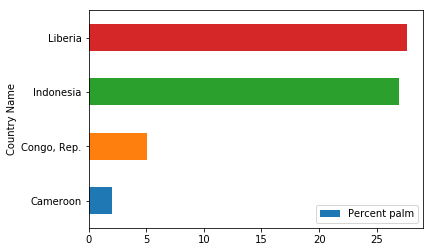

In [160]:
df.plot(kind='barh', x='Country Name', y='Percent palm')

In [161]:
df.to_csv('Four_countries_cleaned.csv', index=False)

In [2]:
df = pd.read_csv('Four_countries_cleaned.csv')

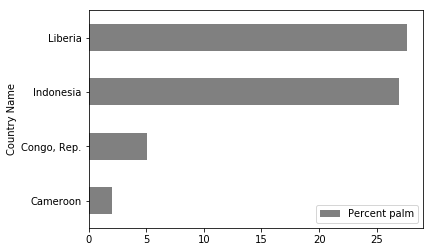

In [10]:
ax = df.plot(kind='barh', x='Country Name', y='Percent palm', color='grey')

plt.savefig("part_palm.pdf")
plt.show()

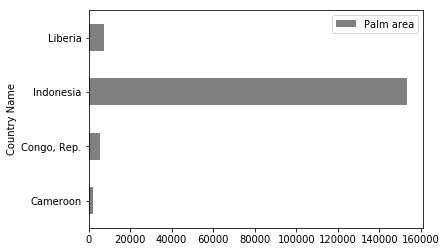

In [11]:
ax = df.plot(kind='barh', x='Country Name', y='Palm area', color='grey')

plt.savefig("palm_area.pdf")
plt.show()